相同X座標下50個點的X方向分量速度總合


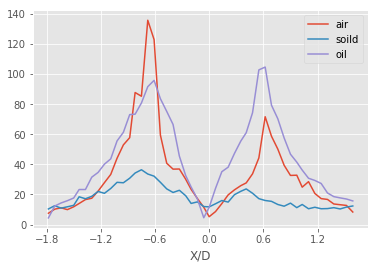

1.3
1.3900000000000001
1.23


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def arrange_data(data_name):
    df=pd.read_csv(data_name)
    df=df.drop(0)
    df=df.dropna(axis=1)
    df["Y"]=df["Y"].astype(float)
    df["Y"]=(df["Y"]*100).astype(int).astype(float)/100
    df["X"]=df["X"].astype(float)
    df["X"]=(df["X"]*100).astype(int).astype(float)/100
    df['absU']=df["U"].abs()
    df['absV2']=df["V"].abs()
    df_x=df.groupby("X").sum().drop('Y',axis=1) 
    
    return df_x

airdata=arrange_data('air.csv')
soilddata=arrange_data('solid.csv')
oildata=arrange_data('oil.csv')


plt.style.use('ggplot')
fig,ax=plt.subplots()

plt.plot(airdata.index,airdata["absU"],label="air")
plt.plot(airdata.index,soilddata["absU"],label="soild")
plt.plot(airdata.index,oildata["absU"],label="oil")

ax.legend()

ax.xaxis.set_major_locator(plt.MaxNLocator(7))
ax.set_xlabel("X/D")
print("相同X座標下50個點的X方向分量速度總合")
plt.show()
def max_Peak(data):
    max1=data[data.index<0]["absU"].idxmax()
    max2=data[data.index>0]["absU"].idxmax()
    
    print(abs(max1-max2))
    

max_Peak(arrange_data('air.csv'))  
max_Peak(arrange_data('solid.csv'))  
max_Peak(arrange_data('oil.csv'))  

